# Yianna Bekris
# RCES
# Assignment 4
# March 5th, 2024

In [2]:
# Problem 1: Line plots
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [3]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


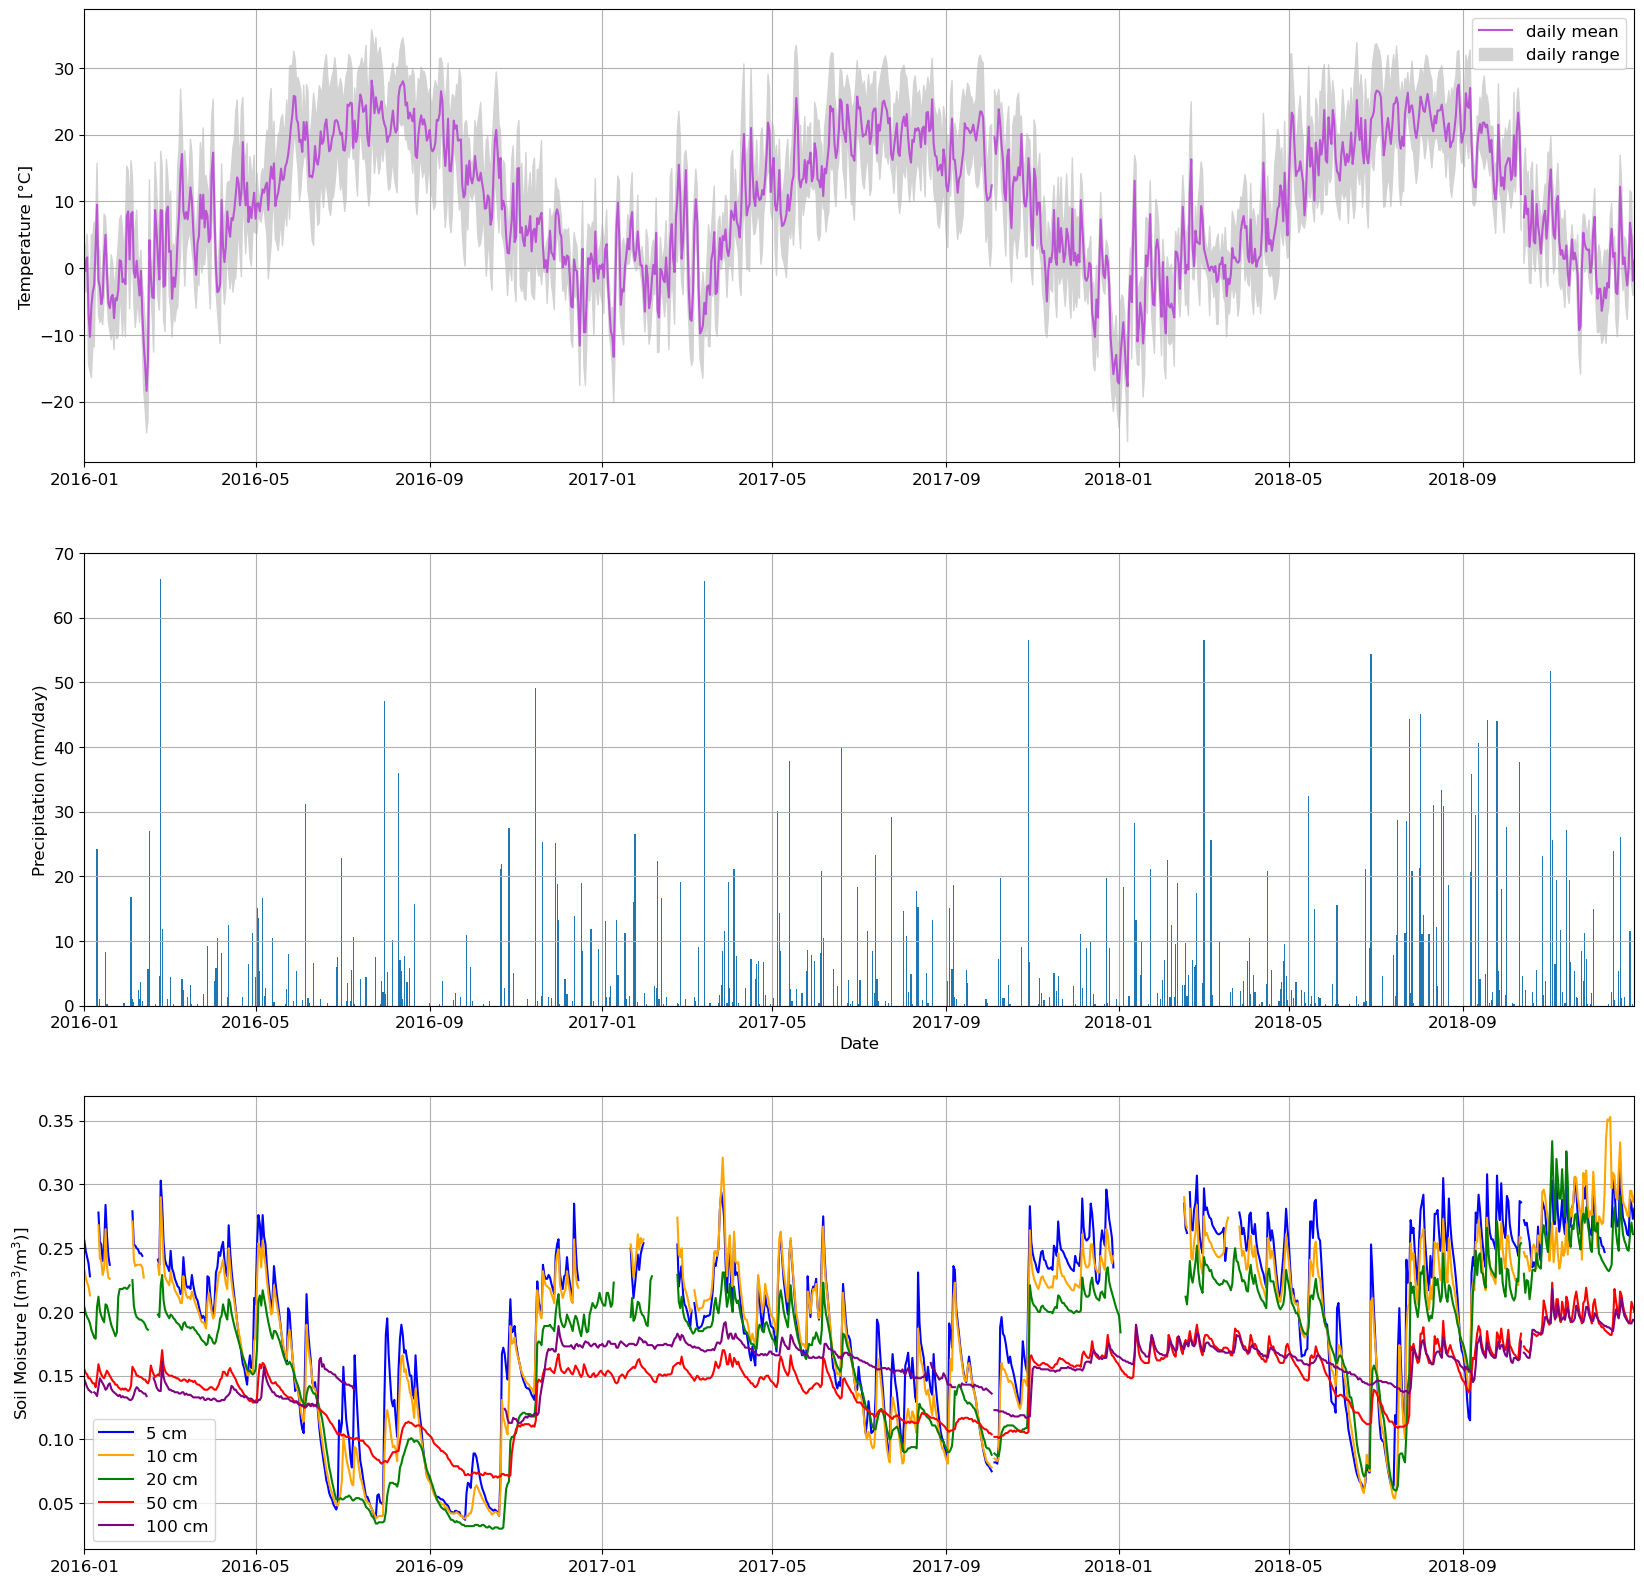

In [17]:
# The cell below uses pandas to download the data and populate a bunch of numpy arrays (t_daily_min, t_daily_max, etc.) 
# Run the cell and then use the numpy arrays to try to re-create the plot you see.
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(3,1,1)

# plt.plot(date, t_daily_max-t_daily_min, color='grey', label='daily range')
plt.plot(date, t_daily_mean, color='mediumorchid', label='daily mean')
plt.fill_between(date, t_daily_min, t_daily_max, color='lightgrey', label='daily range')
plt.grid()
plt.xlim(np.min(date), np.max(date))
plt.ylabel('Temperature [°C]')
plt.legend(loc='upper right')

fig.add_subplot(3,1,2)
plt.bar(date, height=p_daily_calc)
plt.ylabel('Precipitation (mm/day)')
plt.xlabel('Date')
plt.xlim(np.min(date), np.max(date))
plt.ylim(0,70)
plt.grid()

fig.add_subplot(3,1,3)

plt.plot(date, soil_moisture_5, color='blue', label='5 cm')
plt.plot(date, soil_moisture_10, color='orange', label='10 cm')
plt.plot(date, soil_moisture_20, color='green', label='20 cm')
plt.plot(date, soil_moisture_50, color='red', label='50 cm')
plt.plot(date, soil_moisture_100, color='purple', label='100 cm')
plt.grid()
plt.xlim(np.min(date), np.max(date))
plt.ylabel('Soil Moisture [($\mathrm{m}^3/\mathrm{m}^3$)]')
plt.legend(loc='lower left')

# Problem 2: Contour Plots

In [18]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

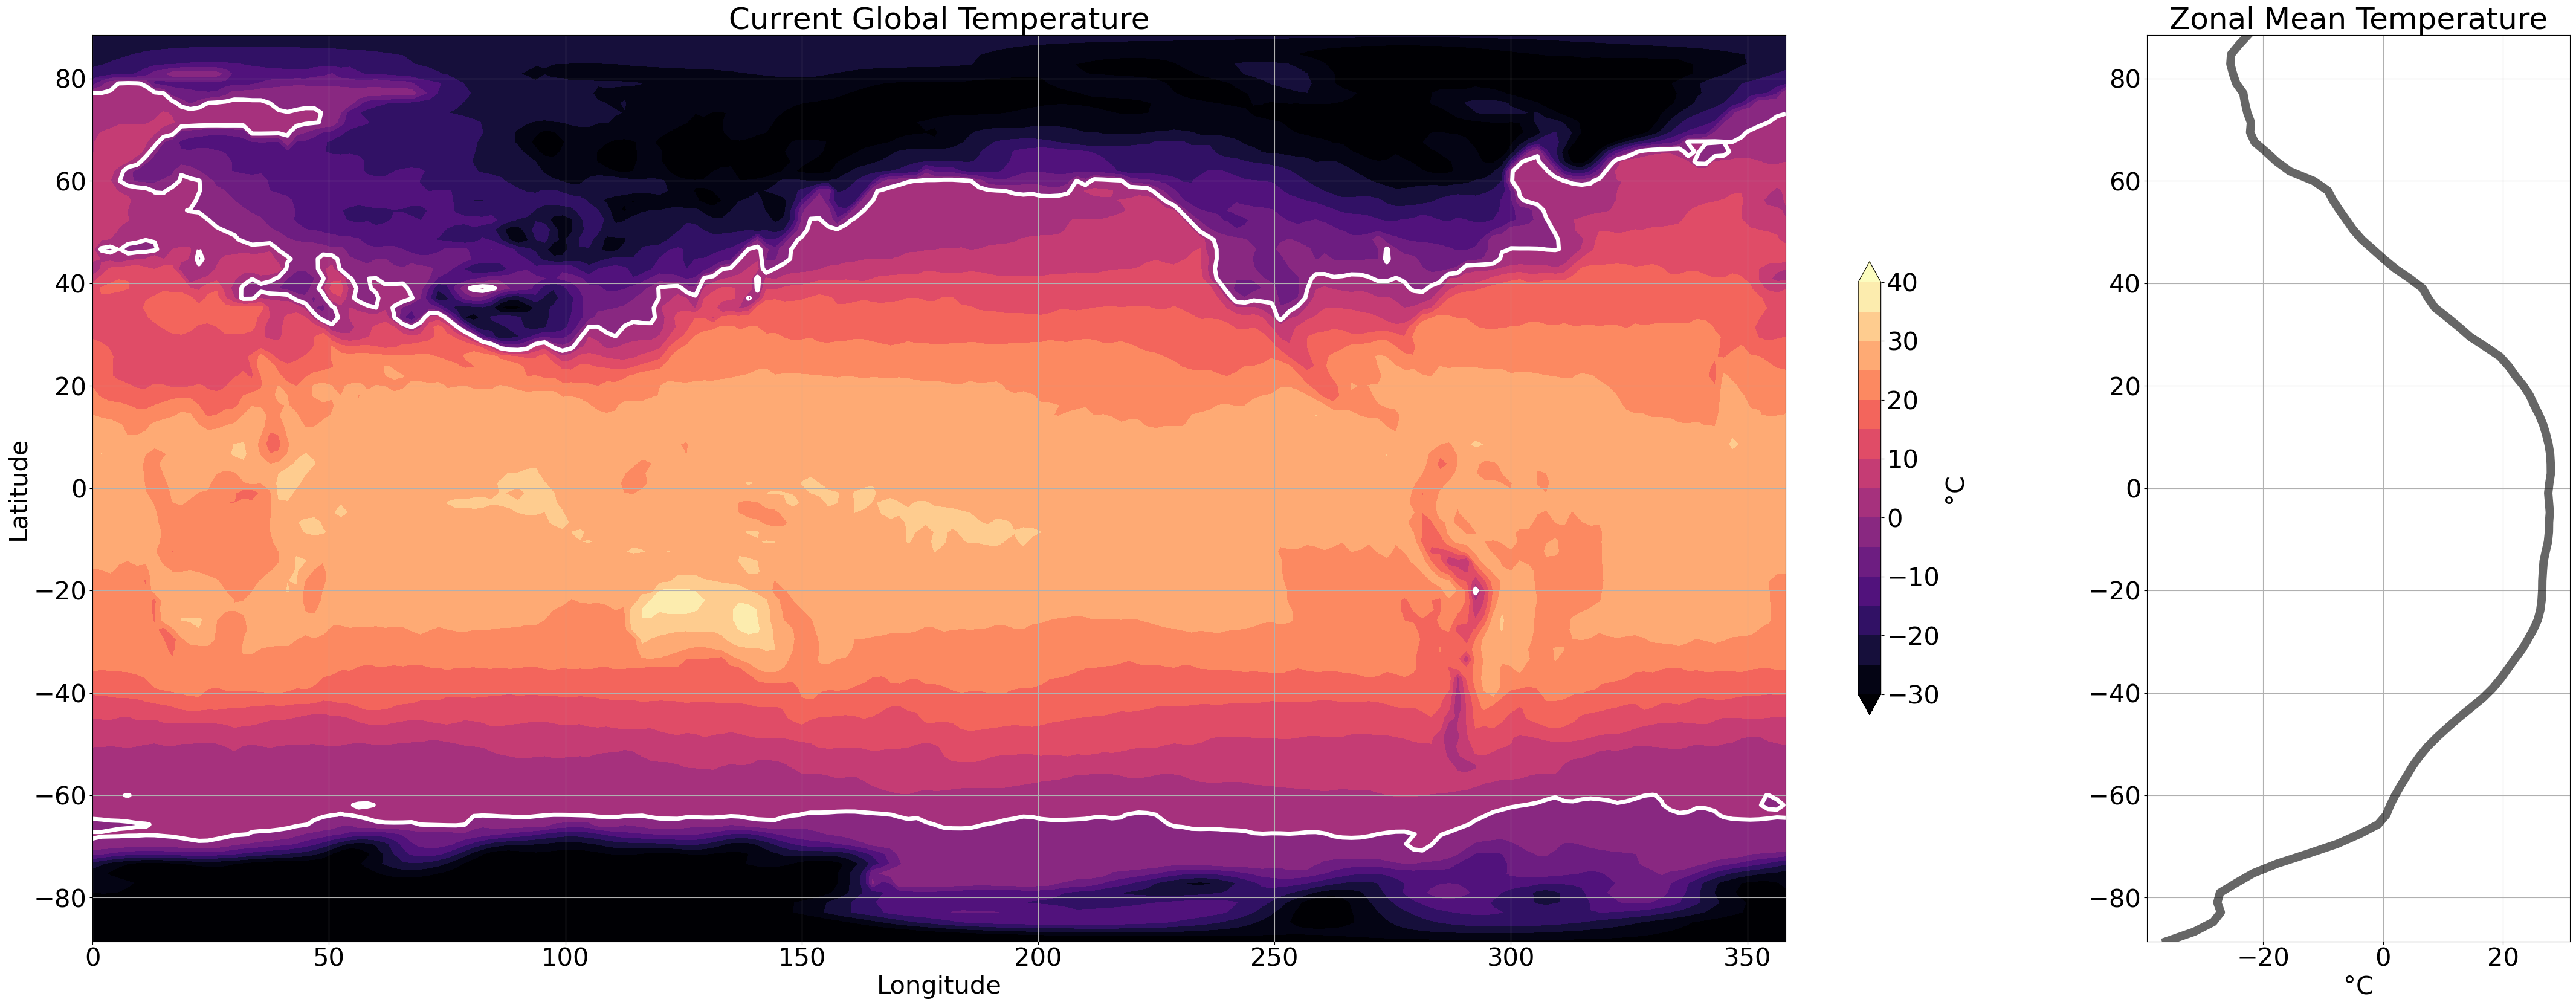

In [88]:
## Set figure size
matplotlib.rcParams.update({'font.size': 30})
fig = plt.figure(figsize=(20, 15))

## Calculate mean at each latitudinal band
zonal_mean = np.nanmean(temp, axis=1)

ax1 = fig.add_axes([0, 0, 1.5, 1])
plt.title('Current Global Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

levels = np.arange(-30, 45, 5)

p1 = ax1.contourf(lon, lat, temp, cmap='magma', levels=levels, extend='both')
ax1.contour(lon, lat, temp, levels=[0], colors='white', linestyles='solid', linewidths=5)
cbar = fig.colorbar(p1, orientation='vertical', extend='both', fraction=0.026, pad=0.04, shrink=0.5)
cbar.set_label('°C')

ax2 = fig.add_axes([1.7, 0, 0.35, 1])
ax2.plot(zonal_mean, lat, color='k', alpha=0.6, linewidth=10)
plt.xlabel('°C')
plt.ylim(min(lat), max(lat))
plt.title('Zonal Mean Temperature')
plt.grid()

In [52]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

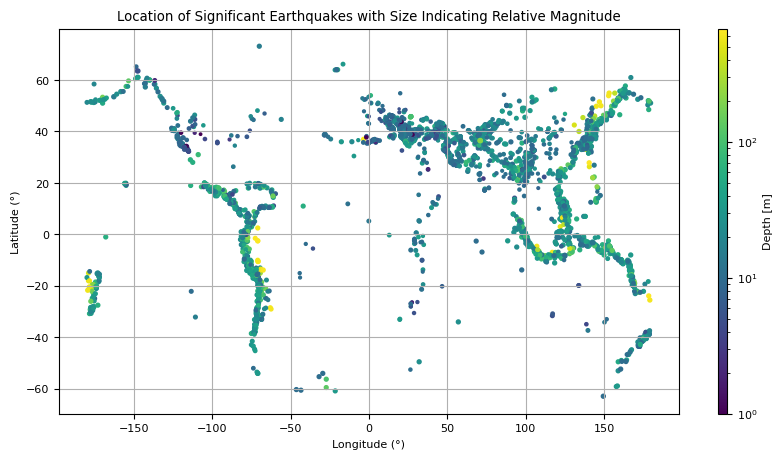

In [78]:
## Set figure size
matplotlib.rcParams.update({'font.size': 8})
fig = plt.figure(figsize=(10, 5))


p1=plt.scatter(
         longitude,
         latitude,
         s=magnitude,
         c=depth,   
         cmap='viridis',
         norm=matplotlib.colors.LogNorm()
         )

plt.grid()
plt.title('Location of Significant Earthquakes with Size Indicating Relative Magnitude')
plt.ylabel('Latitude (°)')
plt.xlabel('Longitude (°)')

cbar = fig.colorbar(p1, orientation='vertical', aspect=40)
cbar.set_label('Depth [m]')
fig.show()